**Import Libraries**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Upload the Dataset to Colab**

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Amazon Sales Records (2).csv to Amazon Sales Records (2).csv


**Extract Data**

In [4]:
# Load the CSV file into a DataFrame
data = pd.read_csv('Amazon Sales Records (2).csv')

# Preview the first few rows
data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,05-28-2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,08-22-2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,05-02-2014,341417157,05-08-2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,06-20-2014,514321792,07-05-2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,02-01-2013,115456712,02-06-2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


**Initial Data Exploration**

In [5]:
# Check for missing values
print(data.isnull().sum())

# Check data types
print(data.dtypes)

# Get an overview of numerical columns
print(data.describe())


Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64
Region             object
Country            object
Item Type          object
Sales Channel      object
Order Priority     object
Order Date         object
Order ID            int64
Ship Date          object
Units Sold          int64
Unit Price        float64
Unit Cost         float64
Total Revenue     float64
Total Cost        float64
Total Profit      float64
dtype: object
           Order ID   Units Sold  Unit Price   Unit Cost  Total Revenue  \
count  1.000000e+02   100.000000  100.000000  100.000000   1.000000e+02   
mean   5.550204e+08  5128.710000  276.761300  191.048000   1.373488e+06   
std    2.606153e+08  2794.484562  235.592241  188.208181   1.460029e+06   
min    1.146066e+08   124.000

**Transform the Data**

In [6]:
# Convert date column to datetime (replace 'Order Date' with the actual column name in your dataset)
data['Order Date'] = pd.to_datetime(data['Order Date'], errors='coerce')

# Drop rows with invalid dates (NaT values)
data = data.dropna(subset=['Order Date'])

# Extract Year and Month from the date column
data['Year'] = data['Order Date'].dt.year
data['Month'] = data['Order Date'].dt.month
data['Year_Month'] = data['Order Date'].dt.to_period('M')


**Create Sales Metrics**

In [7]:
# Calculate Total Sales if 'Quantity' and 'Price' columns are available
# Replace 'Quantity' and 'Price' with actual column names
data['Total Sales'] = data['Units Sold'] * data['Unit Price']

**Handle Missing Values**

In [8]:
# Drop rows with missing values if they’re essential to the analysis
data = data.dropna()

# Optionally, you could fill missing values if needed
# data = data.fillna({'column_name': value})

**Aggregate Data for Sales Trends**

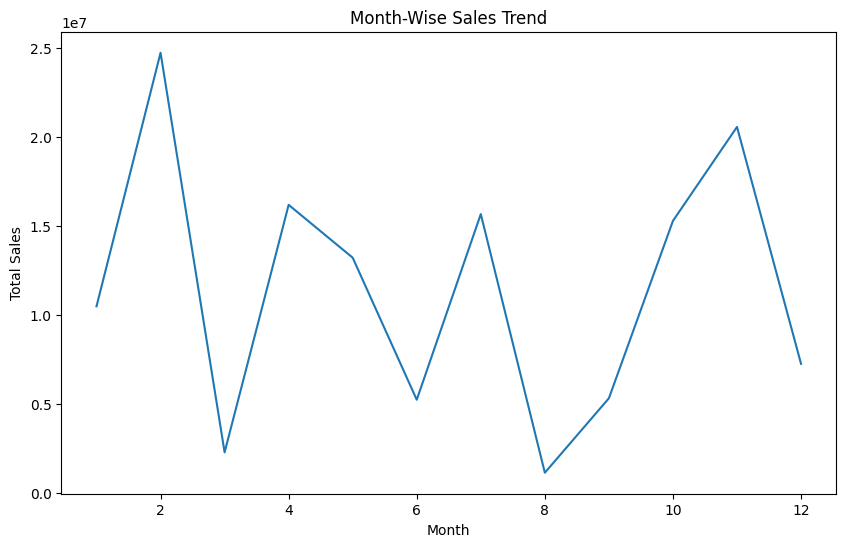

In [9]:
# Group by month and calculate total sales
month_wise_sales = data.groupby('Month')['Total Sales'].sum().reset_index()

# Plot month-wise sales trend
plt.figure(figsize=(10, 6))
sns.lineplot(data=month_wise_sales, x='Month', y='Total Sales')
plt.title('Month-Wise Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

**Year-Wise Sales Trend**

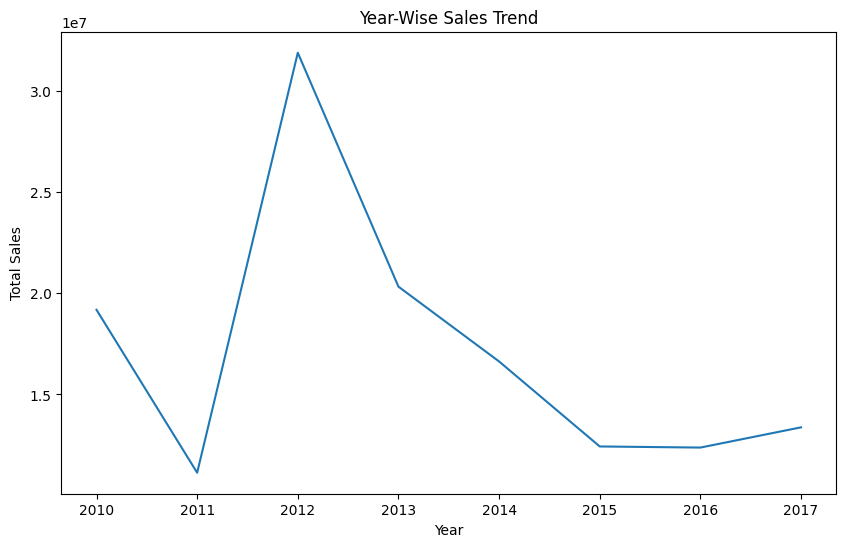

In [10]:
# Group by year and calculate total sales
year_wise_sales = data.groupby('Year')['Total Sales'].sum().reset_index()

# Plot year-wise sales trend
plt.figure(figsize=(10, 6))
sns.lineplot(data=year_wise_sales, x='Year', y='Total Sales')
plt.title('Year-Wise Sales Trend')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.show()

**Ensure Year_Month is Properly Created**

In [11]:
# Ensure 'Order Date' is in datetime format
data['Order Date'] = pd.to_datetime(data['Order Date'], errors='coerce')

# Drop rows with invalid dates
data = data.dropna(subset=['Order Date'])

# Create 'Year_Month' as a period for grouping
data['Year_Month'] = data['Order Date'].dt.to_period('M')


**Group and Convert Year_Month for Plotting**

In [12]:
# Group by 'Year_Month' and calculate total sales
year_month_sales = data.groupby('Year_Month')['Total Sales'].sum().reset_index()

# Convert 'Year_Month' to string for plotting
year_month_sales['Year_Month'] = year_month_sales['Year_Month'].astype(str)


**Plot the Year-Month Sales Trend**

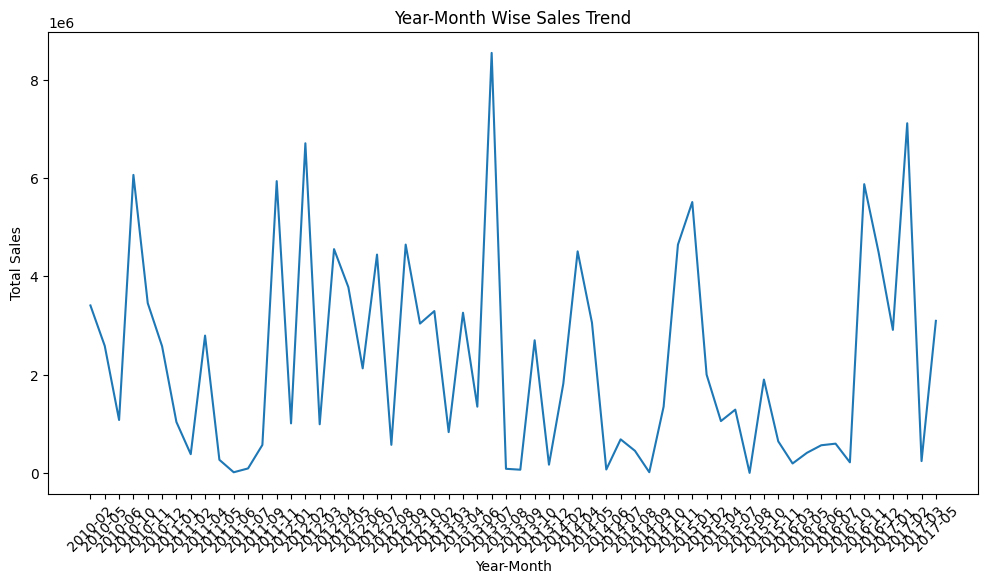

In [13]:
# Plot year-month wise sales trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=year_month_sales, x='Year_Month', y='Total Sales')
plt.title('Year-Month Wise Sales Trend')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


**Load Data**


In [14]:
# Save cleaned data to a new CSV file
data.to_csv('cleaned_amazon_sales_data.csv', index=False)


In [15]:
from google.colab import files
files.download('cleaned_amazon_sales_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Analysis of Key Metrics and Relationships**

In [16]:
# Average Sales
average_sales = data['Total Sales'].mean()

# Top Product by Sales
top_products = data.groupby('Item Type')['Total Sales'].sum().sort_values(ascending=False).head(10)


**Analyze Relationships**

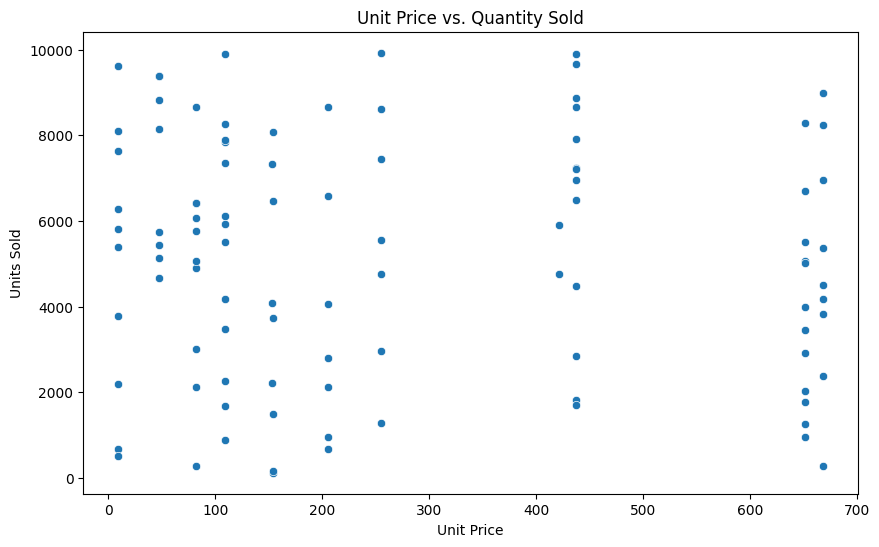

In [17]:
# Scatter plot to show relationship between Unit Price and Unit Sold
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Unit Price', y='Units Sold')
plt.title('Unit Price vs. Quantity Sold')
plt.xlabel('Unit Price')
plt.ylabel('Units Sold')
plt.show()

In [19]:
print(data.head())
print(data.info())


                              Region                Country        Item Type  \
0              Australia and Oceania                 Tuvalu        Baby Food   
1  Central America and the Caribbean                Grenada           Cereal   
2                             Europe                 Russia  Office Supplies   
3                 Sub-Saharan Africa  Sao Tome and Principe           Fruits   
4                 Sub-Saharan Africa                 Rwanda  Office Supplies   

  Sales Channel Order Priority Order Date   Order ID   Ship Date  Units Sold  \
0       Offline              H 2010-05-28  669165933   6/27/2010        9925   
1        Online              C 2012-08-22  963881480   9/15/2012        2804   
2       Offline              L 2014-05-02  341417157  05-08-2014        1779   
3        Online              C 2014-06-20  514321792  07-05-2014        8102   
4       Offline              L 2013-02-01  115456712  02-06-2013        5062   

   Unit Price  Unit Cost  Total Revenu

In [20]:
data.to_csv('Cleaned_Amazon_Sales_Data.csv', index=False)
print("File saved successfully!")


File saved successfully!


In [21]:
import os
print(os.listdir('.'))


['.config', 'Cleaned_Amazon_Sales_Data.csv', 'Amazon Sales Records (2).csv', 'cleaned_amazon_sales_data.csv', 'sample_data']


In [22]:
from google.colab import files
files.download('Cleaned_Amazon_Sales_Data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>